A Build of Finiancia Instrument Class: Instatation

In [152]:
import numpy as np

In [154]:
class FiniancialInstrument():
    pass

In [156]:
stock = FiniancialInstrument()

In [158]:
stock

In [160]:
class FiniancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        

In [162]:
stock = FiniancialInstrument("AAPL", "2015-01-01", "2019-12-31")

In [164]:
stock

In [166]:
stock.ticker

'AAPL'

The method get_data()

In [169]:
import yfinance as yf

In [171]:
yf.download("AAPL", "2015-01-01", "2019-12-31").Close.to_frame()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


In [173]:
raw = yf.download("AAPL", "2015-01-01", "2019-12-31").Close.to_frame()

[*********************100%***********************]  1 of 1 completed


In [175]:
raw

,Close
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


In [177]:
class FiniancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
    def __repr__(self):
        return "FiniancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                                self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

In [179]:
stock = FiniancialInstrument("AAPL", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [181]:
stock

FiniancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [183]:
stock.get_data()

[*********************100%***********************]  1 of 1 completed


In [185]:
stock.data

,price
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


The Methods plot_data() & plot_returns()

In [188]:
stock

FiniancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [190]:
stock.data

,price
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2019-12-23,71.000000
2019-12-24,71.067497
2019-12-26,72.477501


<Axes: xlabel='Date'>

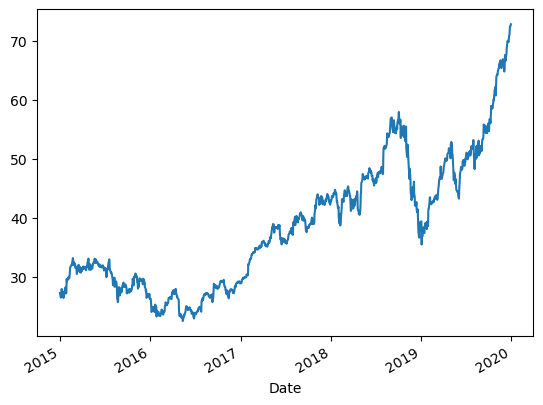

In [192]:
stock.data.price.plot()

In [194]:
stock.data.log_returns.plot()

AttributeError: 'DataFrame' object has no attribute 'log_returns'

In [196]:
stock.data.log_returns.hist(bins = 100)

AttributeError: 'DataFrame' object has no attribute 'log_returns'

In [198]:
class FiniancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()    
        self.log_returns()
    def __repr__(self):
        return "FiniancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker,                                                                              self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        return self.data["log_returns"]
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        # plt.title("Price Chart:{}".format(self.ticker), fontsize = 15)
    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data['log_returns'].plot(figsize=(12, 8))  # Correct access
        elif kind == "hist":
            self.data['log_returns'].hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))


In [200]:
stock = FiniancialInstrument("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


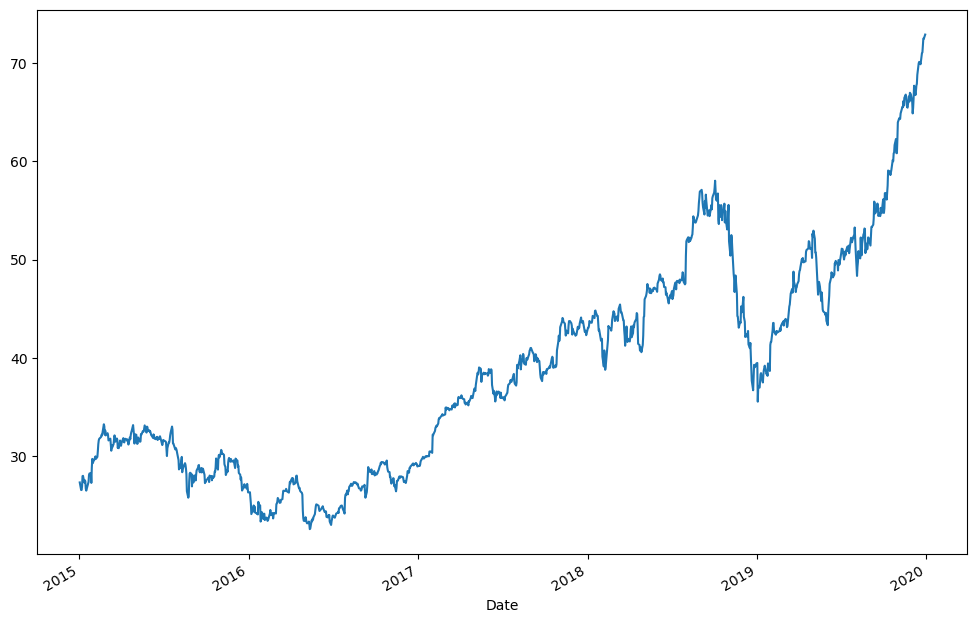

In [202]:
stock.plot_prices()

In [204]:
# stock.log_returns()
# print(stock.data.head())  

In [206]:
# stock.plot_returns(kind = "hist")

Encapsulation

In [209]:
stock

FiniancialInstrument(ticker = aapl, start = 2015-01-01, end = 2019-12-31)

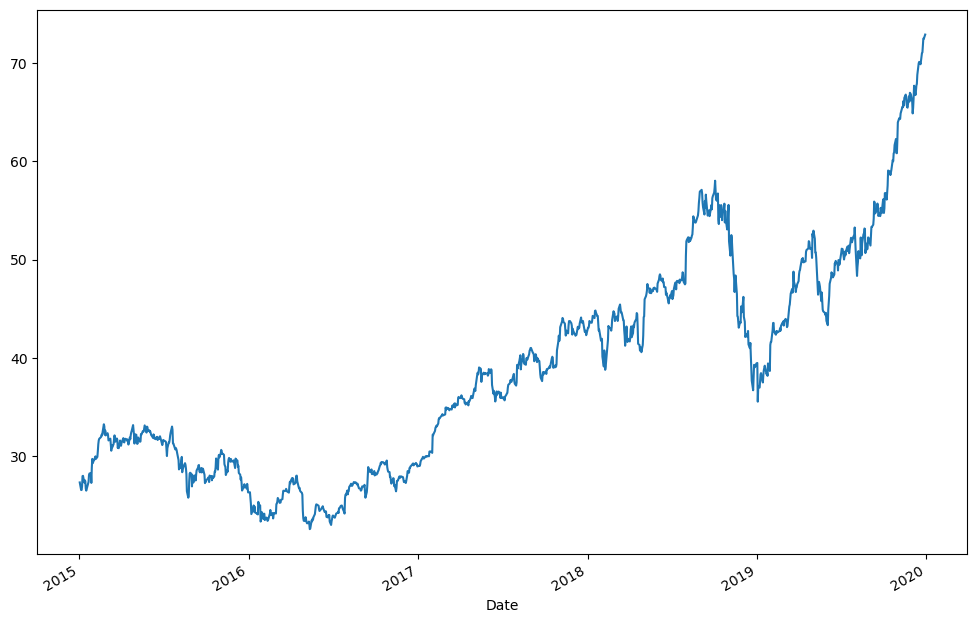

In [211]:
stock.plot_prices()

In [213]:
stock.ticker

'aapl'

In [215]:
stock.ticker = "GE"

In [217]:
stock.ticker

'GE'

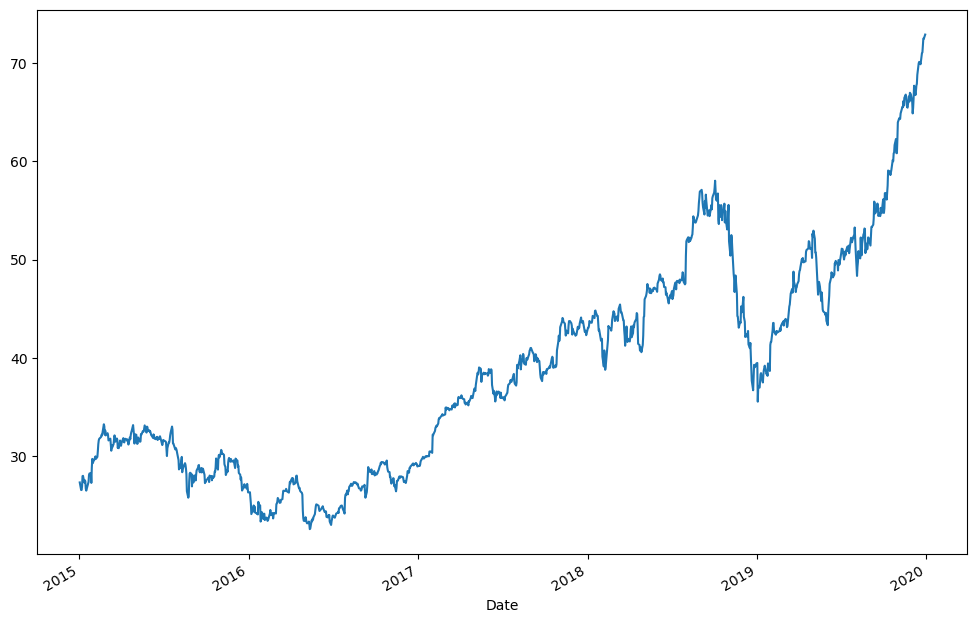

In [219]:
stock.plot_prices()

In [221]:
class FiniancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    def __repr__(self):
        return "FiniancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker,                                                                              self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        return self.data["log_returns"]
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        # plt.title("Price Chart:{}".format(self.ticker), fontsize = 15)
    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data['log_returns'].plot(figsize=(12, 8))  # Correct access
        elif kind == "hist":
            self.data['log_returns'].hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))

In [223]:
stock = FiniancialInstrument("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [225]:
stock

FiniancialInstrument(ticker = aapl, start = 2015-01-01, end = 2019-12-31)

In [227]:
stock.ticker

'aapl'

The method set_ticker()

In [257]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

class FiniancialInstrument():
    def __init__(self, ticker, start, end):
        if ticker is not None:
            self._ticker = ticker  # Store the ticker in the private _ticker attribute
            self.start = start
            self.end = end
            self.get_data()
            self.log_returns()

    def __repr__(self):
        return "FiniancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker,
                                                                                self.start, self.end)

    def get_data(self):
        # Use the private _ticker attribute
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw

    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price / self.data.price.shift(1))
        return self.data["log_returns"]

    def plot_prices(self):
        self.data.price.plot(figsize=(12, 8))
        # plt.title("Price Chart:{}".format(self._ticker), fontsize = 15)

    def plot_returns(self, kind="ts"):
        if kind == "ts":
            self.data['log_returns'].plot(figsize=(12, 8))
        elif kind == "hist":
            self.data['log_returns'].hist(figsize=(12, 8), bins=int(np.sqrt(len(self.data))))

    def set_ticker(self, ticker=None):
        if ticker is not None:
            self._ticker = ticker  # Update the private _ticker attribute
            self.get_data()  # Fetch new data for the new ticker
            self.log_returns()  # Recompute log returns for the new data

# Example usage:
stock = FiniancialInstrument("AAPL", "2015-01-01", "2019-12-31")
stock.set_ticker("GE")  # This should work now


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


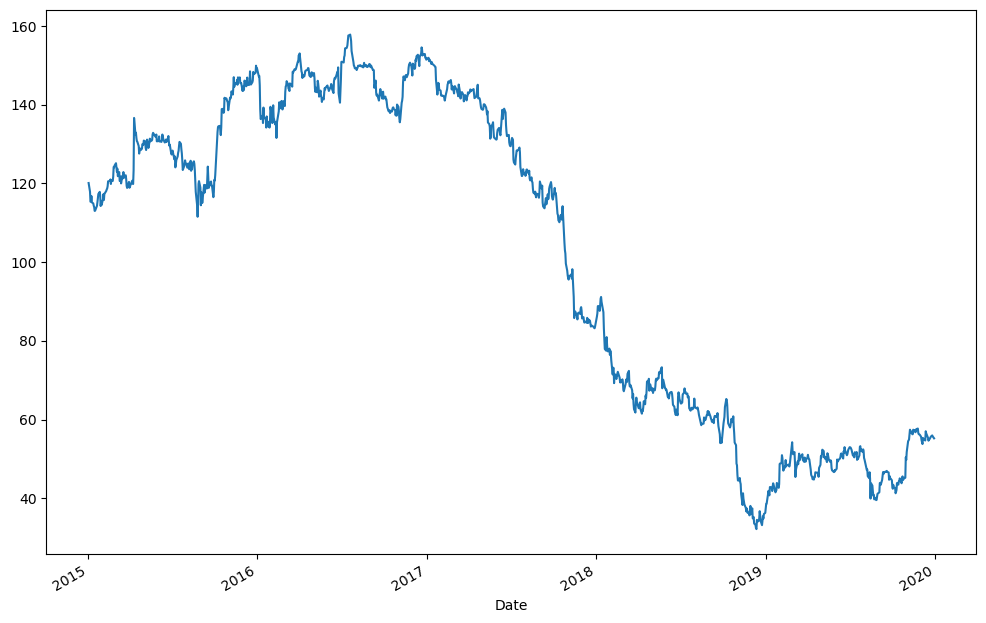

In [259]:
stock.plot_prices()

In [261]:
stock.set_ticker("GE")

[*********************100%***********************]  1 of 1 completed
